In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import ast
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Outlier detection

## Load the data

In [2]:
artists_dataset = pd.read_csv('dataset/tabular/artists_cleaned.csv')
tracks_dataset = pd.read_csv('dataset/tabular/tracks_cleaned.csv')

## Density-based approach

In [3]:
tracks_dataset

,id,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,...,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,year,month,day
0,45OX2jjEw1l7lOFJfDP9fv,MONEY,168227,False,95,LISA,LALISA,0.826,0.55300,1,...,0.789,0.989,0.043,0.253,381.0,95.0,"['k-pop', 'pop']",2021,9.0,10.0
1,5XeFesFbtLpXzIVDNQP22n,I Wanna Be Yours,183956,False,94,Arctic Monkeys,AM,0.464,0.41700,0,...,0.097,1.000,0.545,0.533,202.0,50.0,"['indie', 'garage', 'rock']",2013,9.0,9.0
2,2bRKxuH1o7pTmb1y4GfdEc,Clean White Noise - Loopable with no fade,90228,False,94,White Noise Baby Sleep;White Noise for Babies,Best White Noise for Baby Sleep - Loopable wit...,0.000,0.00342,8,...,0.000,0.000,0.000,0.116,0.0,0.0,['sleep'],2017,1.0,8.0
3,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),175238,True,94,David Guetta;Bebe Rexha,I'm Good (Blue),0.561,0.96500,7,...,0.808,0.789,0.898,0.773,368.0,91.0,['pop'],2022,8.0,26.0
4,0WtM2NBVQNNJLh6scP13H8,Calm Down (with Selena Gomez),239317,False,93,Rema;Selena Gomez,Calm Down (with Selena Gomez),0.801,0.80600,11,...,0.492,1.000,0.593,0.597,424.0,105.0,['pop'],2022,8.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81220,1nSYUQngGS5foiagiilbYU,Singles You Up,182693,False,0,Jordan Davis,Mientras hago aromaterapia,0.634,0.90300,7,...,0.137,1.000,0.439,0.533,296.0,74.0,['country'],2022,10.0,14.0
81221,1nU1tlW9ccptgRLfgq05I3,"Schlagzeile groß, Hirn zu klein",255093,False,0,Frei.Wild,Feinde deiner Feinde (Gold Edition),0.412,0.98400,8,...,0.120,0.762,0.558,0.509,818.0,205.0,['german'],2013,4.0,19.0
81222,72ZHywsIxzF1ZkNlMyhsqt,"Ding! Dong! The Witch Is Dead (From ""The Wizar...",179035,False,0,The Countdown Kids,Happy Halloween! (Spooky Favorites for Kids),0.741,0.93700,11,...,0.826,0.959,0.715,0.532,352.0,87.0,['children'],2022,10.0,14.0
81223,5Wt0gIt7RrXz5mJj5pslLC,Zenitsu Theme V2 (Thunder Clap and Flash!),137948,False,0,Samuel Kim,Demon Slayer: Epic Collection,0.507,0.80300,0,...,0.545,1.000,0.791,0.703,263.0,67.0,['anime'],2021,5.0,21.0


In [32]:
# subset of tracks dataset containing only numerical columns
tracks_dataset_numerical = tracks_dataset.select_dtypes(include=[np.number])
tracks_dataset_numerical

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,year,month,day
0,168227,95,0.826,0.55300,1,-10.121,0,0.2340,0.16300,0.000041,...,162.20880,0.789,0.989,0.043,0.253,381.0,95.0,2021,9.0,10.0
1,183956,94,0.464,0.41700,0,-9.345,0,0.0256,0.13600,0.022000,...,174.09161,0.097,1.000,0.545,0.533,202.0,50.0,2013,9.0,9.0
2,90228,94,0.000,0.00342,8,-28.460,1,0.0000,0.79100,1.000000,...,90.22821,0.000,0.000,0.000,0.116,0.0,0.0,2017,1.0,8.0
3,175238,94,0.561,0.96500,7,-3.673,0,0.0343,0.00383,0.000007,...,163.43945,0.808,0.789,0.898,0.773,368.0,91.0,2022,8.0,26.0
4,239317,93,0.801,0.80600,11,-5.206,1,0.0381,0.38200,0.000669,...,231.09079,0.492,1.000,0.593,0.597,424.0,105.0,2022,8.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81220,182693,0,0.634,0.90300,7,-3.588,1,0.0323,0.04650,0.000000,...,177.22050,0.137,1.000,0.439,0.533,296.0,74.0,2022,10.0,14.0
81221,255093,0,0.412,0.98400,8,-3.725,1,0.6430,0.11900,0.000000,...,247.60017,0.120,0.762,0.558,0.509,818.0,205.0,2013,4.0,19.0
81222,179035,0,0.741,0.93700,11,-5.522,0,0.0421,0.17300,0.000000,...,175.07846,0.826,0.959,0.715,0.532,352.0,87.0,2022,10.0,14.0
81223,137948,0,0.507,0.80300,0,-6.978,0,0.0695,0.00632,0.877000,...,132.38857,0.545,1.000,0.791,0.703,263.0,67.0,2021,5.0,21.0


In [60]:
#Remove columns: 'popularity', 'key', 'mode', 'time_signature', 'month', 'year', 'day', 'key_confidence', 'mode_confidence', 'time_signature_confidence'
tracks_dataset_numerical = tracks_dataset_numerical.drop(columns=['popularity', 'key', 'mode', 'time_signature', 'month', 'year', 'day', 'key_confidence', 'mode_confidence', 'time_signature_confidence'])

In [61]:
tracks_dataset_numerical

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,start_of_fade_out,tempo_confidence,n_beats,n_bars
0,168227,0.826,0.55300,-10.121,0.2340,0.16300,0.000041,0.1350,0.4000,140.037,168228,162.20880,0.789,381.0,95.0
1,183956,0.464,0.41700,-9.345,0.0256,0.13600,0.022000,0.0974,0.4790,67.528,183956,174.09161,0.097,202.0,50.0
2,90228,0.000,0.00342,-28.460,0.0000,0.79100,1.000000,0.1110,0.0000,0.000,90228,90.22821,0.000,0.0,0.0
3,175238,0.561,0.96500,-3.673,0.0343,0.00383,0.000007,0.3710,0.3040,128.040,175238,163.43945,0.808,368.0,91.0
4,239317,0.801,0.80600,-5.206,0.0381,0.38200,0.000669,0.1140,0.8020,106.999,239318,231.09079,0.492,424.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81220,182693,0.634,0.90300,-3.588,0.0323,0.04650,0.000000,0.2550,0.5590,100.083,182693,177.22050,0.137,296.0,74.0
81221,255093,0.412,0.98400,-3.725,0.6430,0.11900,0.000000,0.9020,0.3630,195.058,255093,247.60017,0.120,818.0,205.0
81222,179035,0.741,0.93700,-5.522,0.0421,0.17300,0.000000,0.3330,0.7380,120.005,179036,175.07846,0.826,352.0,87.0
81223,137948,0.507,0.80300,-6.978,0.0695,0.00632,0.877000,0.0693,0.2020,116.896,137949,132.38857,0.545,263.0,67.0


In [62]:
numerical_data = tracks_dataset_numerical.values
numerical_data

array([[1.68227e+05, 8.26000e-01, 5.53000e-01, ..., 7.89000e-01,
        3.81000e+02, 9.50000e+01],
       [1.83956e+05, 4.64000e-01, 4.17000e-01, ..., 9.70000e-02,
        2.02000e+02, 5.00000e+01],
       [9.02280e+04, 0.00000e+00, 3.42000e-03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.79035e+05, 7.41000e-01, 9.37000e-01, ..., 8.26000e-01,
        3.52000e+02, 8.70000e+01],
       [1.37948e+05, 5.07000e-01, 8.03000e-01, ..., 5.45000e-01,
        2.63000e+02, 6.70000e+01],
       [7.28130e+04, 3.02000e-01, 1.22000e-01, ..., 7.10000e-02,
        1.52000e+02, 3.70000e+01]])

In [63]:
# Scaling the data
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_data)

In [64]:
# Applying Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=30, contamination=0.01)  # 5% of data as outliers
outliers = lof.fit_predict(numerical_scaled)

In [65]:
# Identifying outlier rows
outlier_indices = outliers == -1

# Show some of the outlier data points
outlier_data = tracks_dataset_numerical[outlier_indices]
outlier_data.head(), outlier_data.shape

(     duration_ms  danceability  energy  loudness  speechiness  acousticness  \
 123       208211         0.544   0.369    -9.514       0.0380        0.9690   
 131       205946         0.649   0.716    -5.371       0.0349        0.0863   
 175       293293         0.392   0.370   -10.888       0.0298        0.2050   
 456       260773         0.383   0.637    -6.993       0.0703        0.0722   
 578       230240         0.573   0.739    -5.740       0.1290        0.0285   
 
      instrumentalness  liveness  valence    tempo  features_duration_ms  \
 123          0.279000    0.6390   0.1020   87.010                208212   
 131          0.000026    0.1350   0.1630   99.988                205947   
 175          0.009600    0.0821   0.5120   48.718                293293   
 456          0.000000    0.3680   0.0827  177.913                260773   
 578          0.000000    0.1110   0.4510   97.085                230240   
 
      start_of_fade_out  tempo_confidence  n_beats  n_bars  

### Trying to apply LOF on the PCA transformed data

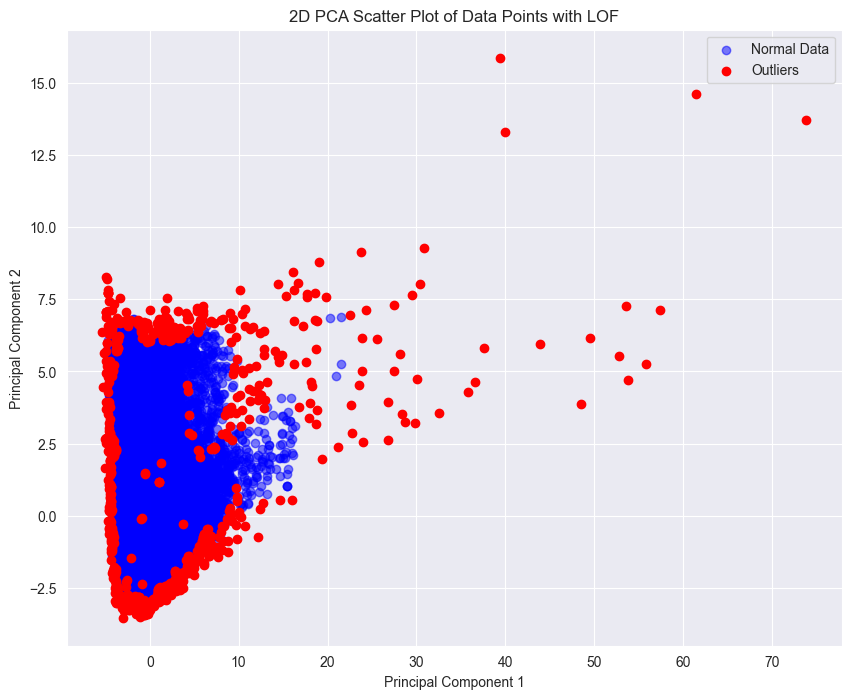

In [66]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
numerical_reduced_2d = pca_2d.fit_transform(numerical_scaled)

# Applying LOF on the 2D PCA-reduced data
lof_pca_2d = LocalOutlierFactor(n_neighbors=30, contamination=0.01)
outliers_pca_2d = lof_pca_2d.fit_predict(numerical_reduced_2d)

# Identifying outlier indices based on LOF predictions in 2D
outlier_indices_pca_2d = outliers_pca_2d == -1

# Creating a 2D scatter plot with PCA results after LOF
plt.figure(figsize=(10, 8))
plt.scatter(numerical_reduced_2d[~outlier_indices_pca_2d, 0], numerical_reduced_2d[~outlier_indices_pca_2d, 1], c='blue', label='Normal Data', alpha=0.5)
plt.scatter(numerical_reduced_2d[outlier_indices_pca_2d, 0], numerical_reduced_2d[outlier_indices_pca_2d, 1], c='red', label='Outliers', alpha=1.0)

# Labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('2D PCA Scatter Plot of Data Points with LOF')
plt.show()

In [67]:
outlier_data_pca = tracks_dataset_numerical[outlier_indices_pca_2d]

In [68]:
outlier_data_pca

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,start_of_fade_out,tempo_confidence,n_beats,n_bars
2,90228,0.0000,0.00342,-28.460,0.0000,0.79100,1.000000,0.1110,0.0000,0.000,90228,90.22821,0.000,0.0,0.0
134,102860,0.8740,0.86900,-5.996,0.0315,0.00116,0.002380,0.1640,0.7260,126.027,102861,98.48163,0.951,207.0,50.0
1220,174646,0.9050,0.96200,-3.197,0.0856,0.02990,0.000000,0.0272,0.9060,129.969,174647,168.97160,0.943,370.0,91.0
2226,156800,0.9010,0.93400,-2.345,0.2730,0.00794,0.000077,0.1940,0.8680,150.037,156800,153.11238,0.538,384.0,95.0
2355,480706,0.4860,0.88100,-5.623,0.0474,0.02440,0.000000,0.4290,0.6670,144.997,480707,459.05270,0.816,1153.0,288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81057,17453,0.4670,0.03010,-28.518,0.0428,0.99500,0.900000,0.1240,0.0000,84.375,17453,17.45333,0.077,22.0,4.0
81114,335666,0.0918,0.03250,-26.707,0.0494,0.99500,0.864000,0.1090,0.0393,68.958,335667,308.36100,0.013,407.0,102.0
81127,30474,0.7760,0.75500,-9.867,0.0668,0.02900,0.000123,0.6500,0.8530,126.011,30474,30.47447,0.751,64.0,15.0
81153,1339977,0.1640,0.25900,-16.207,0.0377,0.69600,0.533000,0.1220,0.0350,86.187,1339977,1335.16480,0.146,1925.0,485.0


In [69]:
outlier_data

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,start_of_fade_out,tempo_confidence,n_beats,n_bars
123,208211,0.544,0.369,-9.514,0.0380,0.9690,0.279000,0.6390,0.1020,87.010,208212,189.06848,0.051,585.0,194.0
131,205946,0.649,0.716,-5.371,0.0349,0.0863,0.000026,0.1350,0.1630,99.988,205947,199.16916,0.010,675.0,168.0
175,293293,0.392,0.370,-10.888,0.0298,0.2050,0.009600,0.0821,0.5120,48.718,293293,280.25323,0.015,343.0,86.0
456,260773,0.383,0.637,-6.993,0.0703,0.0722,0.000000,0.3680,0.0827,177.913,260773,250.87420,0.001,388.0,98.0
578,230240,0.573,0.739,-5.740,0.1290,0.0285,0.000000,0.1110,0.4510,97.085,230240,215.78304,0.044,734.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81012,28026,0.612,0.137,-31.953,0.7920,0.8480,0.000000,0.0868,0.3930,100.765,28027,28.02667,0.375,43.0,10.0
81078,213578,0.173,0.803,-10.071,0.1440,0.6130,0.001910,0.1950,0.0887,75.564,213578,206.24544,0.026,267.0,89.0
81121,21240,0.424,0.869,-8.168,0.0728,0.7070,0.089300,0.1170,0.0000,135.107,21240,21.24000,0.138,37.0,9.0
81126,243600,0.130,0.286,-19.418,0.0383,0.9600,0.322000,0.3260,0.1040,46.496,243600,238.24254,0.148,244.0,80.0
